In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('fashion_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'fashion_data.csv'

In [3]:
df.head()

,UserId,Followings,Followers,MediaCount,BrandName,BrandCategory,Hashtags,Caption,ImgURL,Likes,...,NumberOfPeople,NumberOfFashionProduct,Anger,Contempt,Disgust,Fear,Happiness,Neutral,Sadness,Surprise
0,1171579752855683619_212070047,518.0,9840.0,541,abercrombie,High street,"beautiful, summer, fashion, love, cute, food, ...","We were born to be REAL, not to be perfect. ...",https://scontent.cdninstagram.com/t51.2885-15/...,97,...,0.931486,3.42211,0.083862,0.015089,0.000583,0.000026,0.000017,0.890586,0.009657,0.000181
1,1171594777274371222_176762322,7333.0,2300.0,272,abercrombie,High street,"teen, model, brunette, selfie, hollister, snap...","Gotta run, but first, let me take selfie. Me...",https://scontent.cdninstagram.com/t51.2885-15/...,94,...,0.466329,2.91971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1171407552643586413_581125501,131.0,605.0,106,abercrombie,High street,"alexandani, cute, llbean, beanboots, anthropol...",dress to impress\U0001f457,https://scontent.cdninstagram.com/t51.2885-15/...,91,...,1.116500,4.69096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1171407552643586413_581125501,131.0,605.0,106,abercrombie,High street,"alexandani, cute, llbean, beanboots, anthropol...",dress to impress\U0001f457,https://scontent.cdninstagram.com/t51.2885-15/...,94,...,1.116500,4.69096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1171508187966229230_2797323089,132.0,456.0,56,abercrombie,High street,"abercrombieandfitch, shopping, love, hollister...",#love #shopping #shoppen #hollister #abercro...,https://scontent.cdninstagram.com/t51.2885-15/...,9,...,0.393063,1.45586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
df['CreationTime'] = pd.to_datetime(df['CreationTime'])

In [5]:
df['Hashtags'] = df['Hashtags'].fillna('')

In [6]:
df['Hashtags'] = df['Hashtags'].str.split(',')
df = df.explode('Hashtags')


In [7]:
hashtag_usage = df.groupby('Hashtags')['Hashtags'].count().reset_index(name='post_count')

In [8]:
hashtag_engagement = df.groupby('Hashtags').agg({
    'Likes': 'sum',
}).reset_index()

In [9]:
hashtag_popularity = pd.merge(hashtag_usage, hashtag_engagement, on='Hashtags')

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(hashtag_popularity[['post_count', 'Likes']])


In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
hashtag_popularity['cluster'] = kmeans.fit_predict(scaled_data)

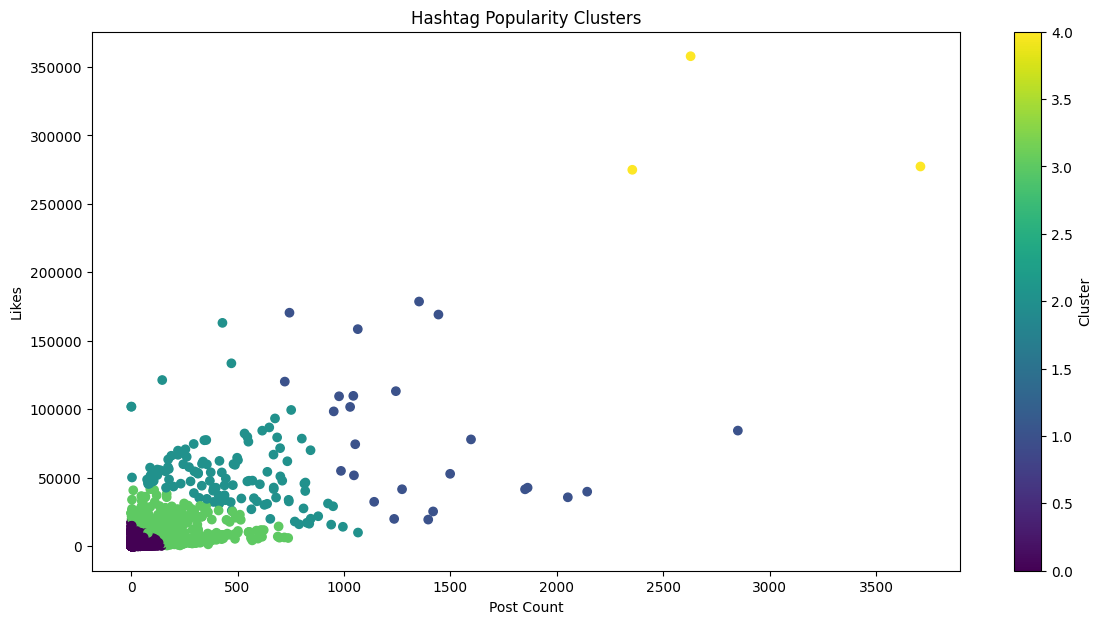

In [12]:
plt.figure(figsize=(14, 7))
plt.scatter(hashtag_popularity['post_count'], hashtag_popularity['Likes'], c=hashtag_popularity['cluster'], cmap='viridis')
plt.title('Hashtag Popularity Clusters')
plt.xlabel('Post Count')
plt.ylabel('Likes')
plt.colorbar(label='Cluster')
plt.show()

In [13]:
for cluster in range(5):
    cluster_hashtags = hashtag_popularity[hashtag_popularity['cluster'] == cluster].sort_values(by='post_count', ascending=False)
    print(f"Cluster {cluster}:")
    print(cluster_hashtags.head(10)[['Hashtags', 'post_count', 'Likes']])
    print("\n")

Cluster 0:
                                    Hashtags  post_count  Likes
366                                    2hand         144    402
50750                               tasmurah         144    458
31128                        katespadewallet         141    456
4711          \u30d7\u30ec\u30bc\u30f3\u30c8         139   1187
57462               \u30aa\u30b7\u30e3\u30ec         134   1245
1620          \u043c\u0438\u043d\u0441\u043a         133   2586
6470                      \u81ea\u64ae\u308a         132   1572
45691                                 sanrio         132    907
930     \u0430\u0441\u0442\u0430\u043d\u0430         131   2576
5053                      \u30e9\u30f3\u30c1         131   1040


Cluster 1:
            Hashtags  post_count   Likes
15669         chanel        2851   84445
42966          prada        2143   39839
19221           dior        2052   35738
25567          gucci        1863   42754
26583         hermes        1851   41563
56849           zara      

In [14]:
#using flitering
keywords = ['butterfly', 'heart']
filtered_df = df[df['Hashtags'].str.contains('|'.join(keywords), case=False)]

In [15]:
hashtag_usage = filtered_df.groupby('Hashtags')['Hashtags'].count().reset_index(name='post_count')

In [16]:
columns_to_agg = {}
if 'Likes' in df.columns:
    columns_to_agg['Likes'] = 'sum'
if 'Comments' in df.columns:
    columns_to_agg['Comments'] = 'sum'

In [17]:
hashtag_engagement = filtered_df.groupby('Hashtags').agg(columns_to_agg).reset_index()


In [18]:
hashtag_popularity = pd.merge(hashtag_usage, hashtag_engagement, on='Hashtags')

In [19]:
hashtag_popularity = hashtag_popularity.sort_values(by='post_count', ascending=False)

In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(hashtag_popularity[['post_count'] + list(columns_to_agg.keys())])

In [21]:
kmeans = KMeans(n_clusters=5, random_state=42)
hashtag_popularity['cluster'] = kmeans.fit_predict(scaled_data)

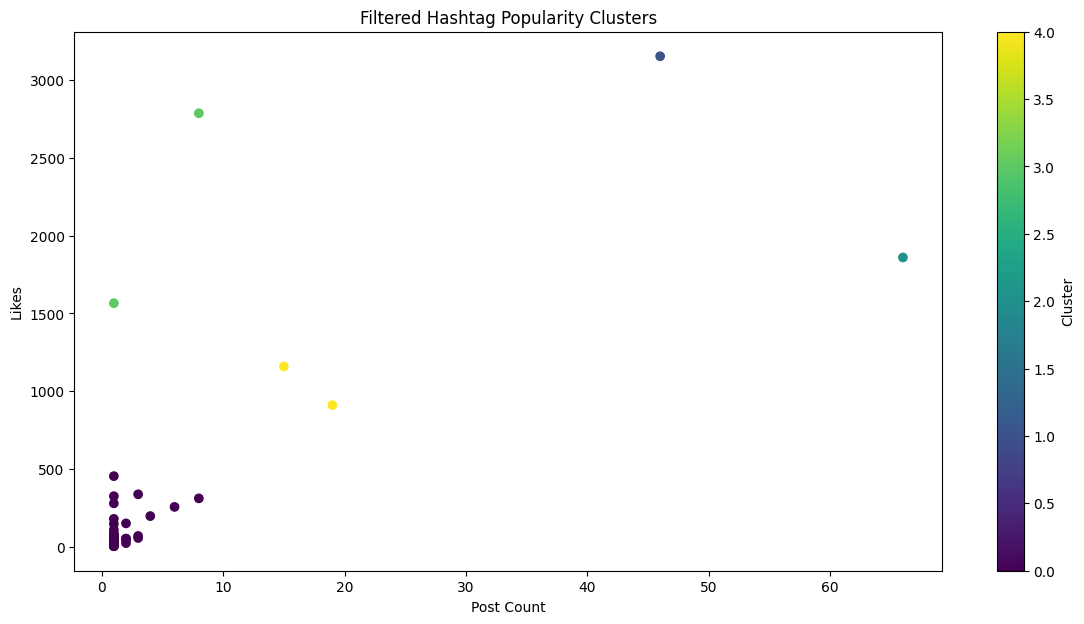

In [22]:
plt.figure(figsize=(14, 7))
plt.scatter(hashtag_popularity['post_count'], hashtag_popularity['Likes'], c=hashtag_popularity['cluster'], cmap='viridis')
plt.title('Filtered Hashtag Popularity Clusters')
plt.xlabel('Post Count')
plt.ylabel('Likes')
plt.colorbar(label='Cluster')
plt.show()


In [23]:
for cluster in range(5):
    cluster_hashtags = hashtag_popularity[hashtag_popularity['cluster'] == cluster].sort_values(by='post_count', ascending=False)
    print(f"Cluster {cluster}:")
    print(cluster_hashtags.head(10)[['Hashtags', 'post_count'] + list(columns_to_agg.keys())])
    print("\n")


Cluster 0:
             Hashtags  post_count  Likes
61          butterfly           8    310
19              heart           6    255
22             hearts           4    196
47         sweetheart           3     68
45         rebelheart           3     55
11        chomehearts           3    336
54   topimpabutterfly           2     51
58          wildheart           2    149
30     hippieandheart           2     45
66             hearts           2     50


Cluster 1:
         Hashtags  post_count  Likes
13   chromehearts          46   3155


Cluster 2:
        Hashtags  post_count  Likes
62  chromehearts          66   1860


Cluster 3:
            Hashtags  post_count  Likes
44      mysweetheart           8   2788
14   chromehearts22k           1   1566


Cluster 4:
      Hashtags  post_count  Likes
56   weheartit          19    910
64       heart          15   1159




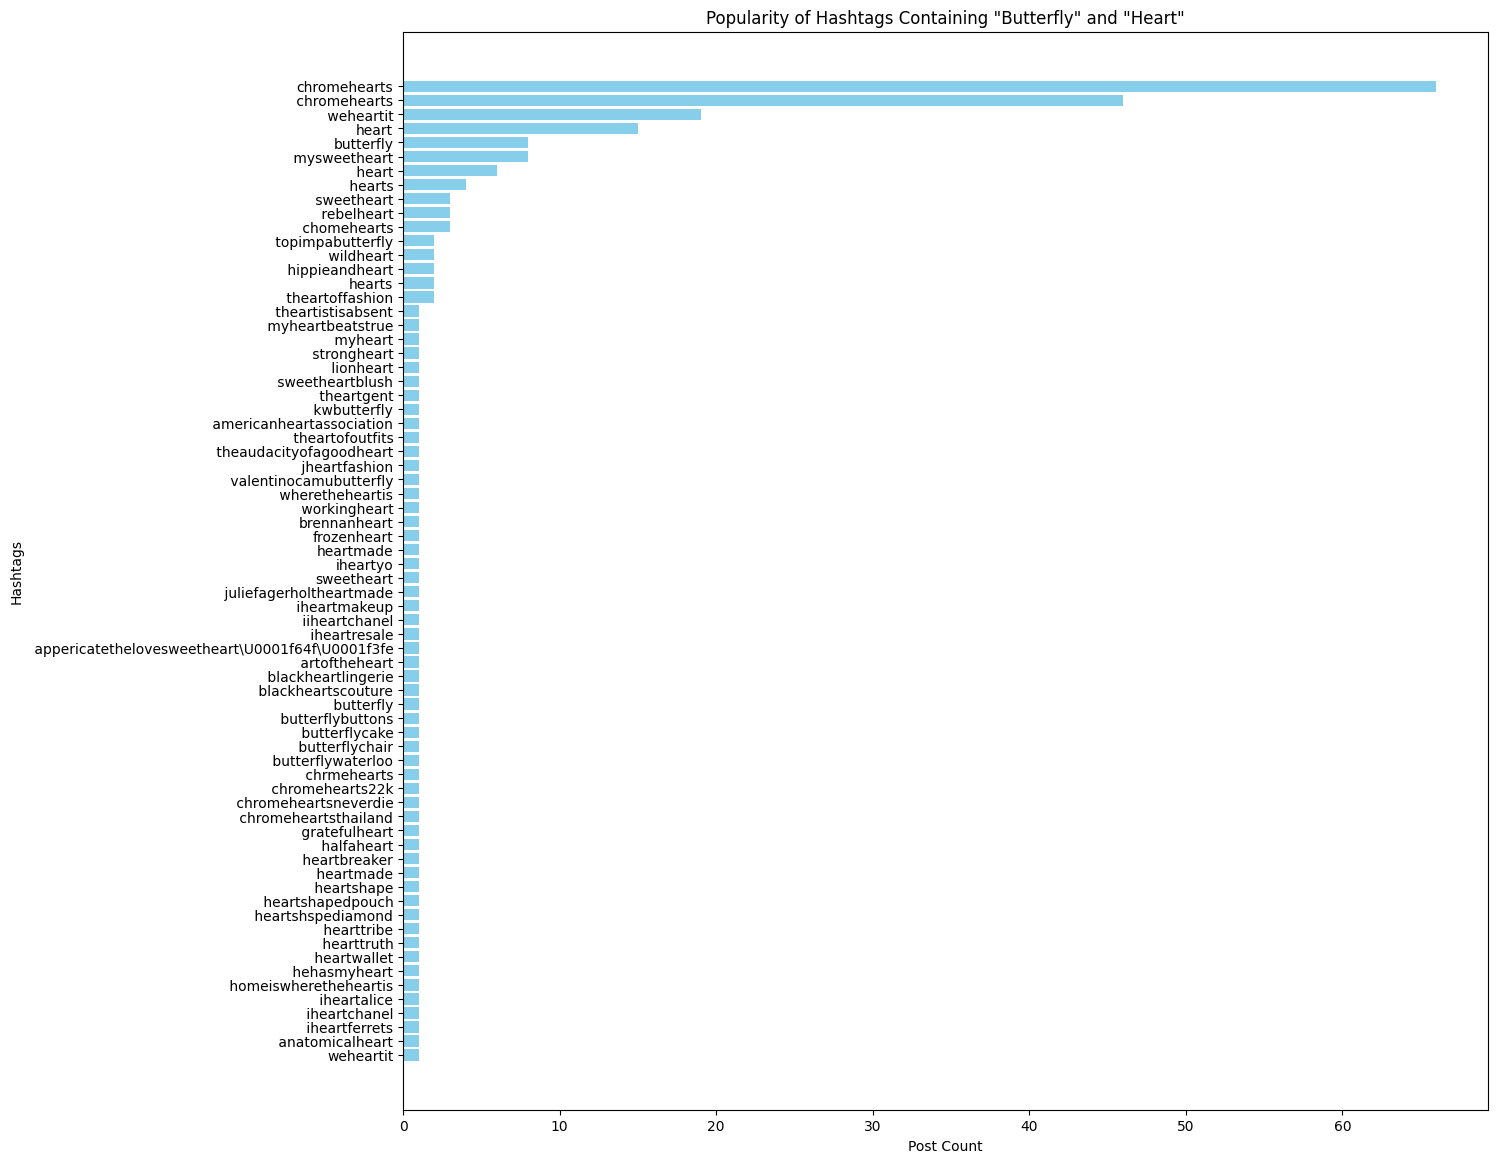

In [24]:
plt.figure(figsize=(14, 14))
plt.barh(hashtag_popularity['Hashtags'], hashtag_popularity['post_count'], color='skyblue')
plt.xlabel('Post Count')
plt.ylabel('Hashtags')
plt.title('Popularity of Hashtags Containing "Butterfly" and "Heart"')
plt.gca().invert_yaxis()
plt.show()


In [25]:
print("Top 10 Modern Hashtags with 'Butterfly' and 'Heart':")
print(hashtag_popularity.head(10)[['Hashtags', 'post_count'] + list(columns_to_agg.keys())])

Top 10 Modern Hashtags with 'Butterfly' and 'Heart':
         Hashtags  post_count  Likes
62   chromehearts          66   1860
13   chromehearts          46   3155
56      weheartit          19    910
64          heart          15   1159
61      butterfly           8    310
44   mysweetheart           8   2788
19          heart           6    255
22         hearts           4    196
47     sweetheart           3     68
45     rebelheart           3     55


In [26]:
df['Hashtags'] = df['Hashtags'].fillna('')

# Split hashtags and explode the list into rows
df['Hashtags'] = df['Hashtags'].str.split(',')
df = df.explode('Hashtags')

# Strip whitespace from hashtags
df['Hashtags'] = df['Hashtags'].str.strip()

# Calculate the frequency of each hashtag
hashtag_counts = df['Hashtags'].value_counts().reset_index()
hashtag_counts.columns = ['Hashtag', 'Count']

# Display the top trending hashtags
print(hashtag_counts.head(10))


   Hashtag  Count
0  fashion   5153
1   chanel   2861
2    style   2711
3     ootd   2667
4    prada   2145
5     dior   2053
6    gucci   1893
7   hermes   1857
8     zara   1656
9    fendi   1512


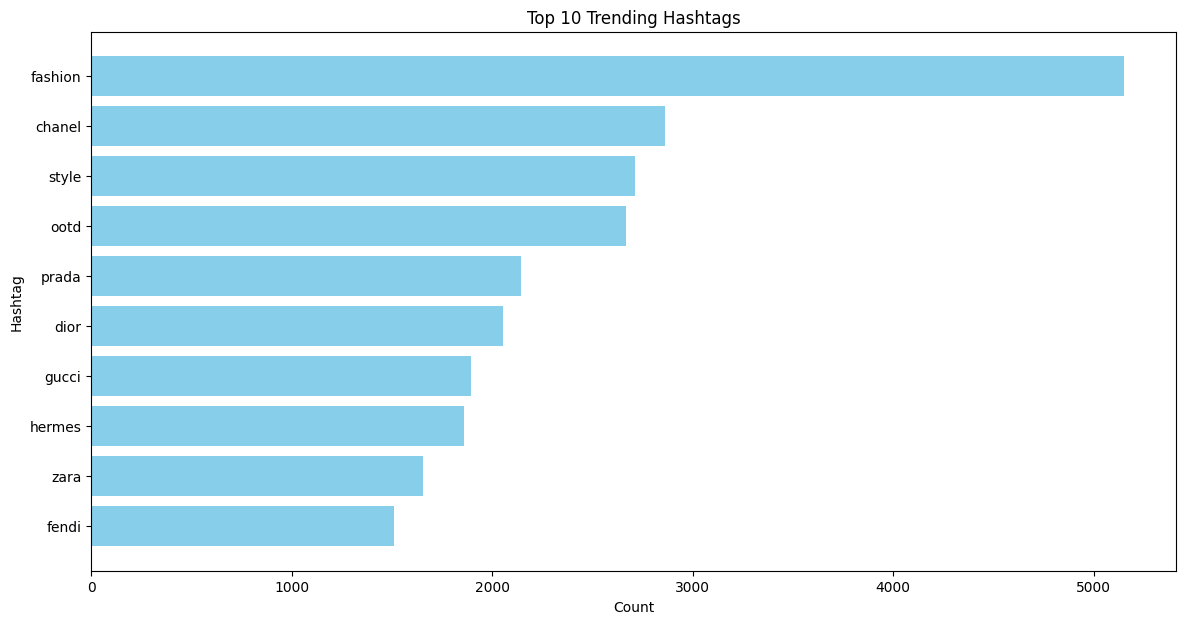

In [27]:
plt.figure(figsize=(14, 7))
plt.barh(hashtag_counts['Hashtag'].head(10), hashtag_counts['Count'].head(10), color='skyblue')
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.title('Top 10 Trending Hashtags')
plt.gca().invert_yaxis()
plt.show()